In [1]:
import msprime
from IPython.display import SVG, display
import sys
import tskit

In [2]:
# Define the population size and number of samples
pop_size = 20000
num_dip = 1000

# Simulate ancestry with a constant population size
ts = msprime.sim_ancestry(samples=num_dip, population_size=pop_size,
                          random_seed=42, model=msprime.StandardCoalescent())
ts

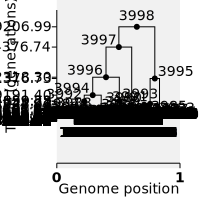

In [3]:
SVG(ts.draw_svg(y_axis=True))

In [5]:
ts.dump("constant_20000pop_1000dip.trees")
new_ts = tskit.load("constant_20000pop_1000dip.trees")

In [6]:
vcf_file = "constant_20000pop_1000dip.vcf"
with open(vcf_file, "w") as vcf_out:
    ts.write_vcf(vcf_out)

In [7]:
new_ts


In [5]:
test_ts = tskit.load("data/varGRCh38_20000pop_1000dip.trees")

FileNotFoundError: [Errno 2] No such file or directory: 'data/varGRCh38_20000pop_1000dip.trees'

In [3]:
test_ts

In [6]:
vcf_file = "variableGRCh38_20000pop_1000dip.vcf"
with open(vcf_file, "w") as vcf_out:
    test_ts.write_vcf(vcf_out)

In [10]:
# illustration example multiple trees and mutation
pop_size=10_000
seq_length=10_000_000

sweep_model = msprime.SweepGenicSelection(
    position=seq_length/2, start_frequency=0.0001, end_frequency=0.9999, s=0.25, dt=1e-6)

test_ts = msprime.sim_ancestry(
    20,
    model=[sweep_model, msprime.StandardCoalescent()],
    population_size=pop_size,
    sequence_length=seq_length,
    recombination_rate=1e-8,
    random_seed=1234,  # only needed for repeatabilty
    )
# Optionally add finite-site mutations to the ts using the Jukes & Cantor model, creating SNPs
test_ts = msprime.sim_mutations(test_ts, rate=1e-8, random_seed=4321)
test_ts

In [ ]:
# print genotypes
import numpy as np
np.set_printoptions(linewidth=200)  # print genotypes on a single line

print("Genotypes")
for v in new_ts.variants():
    print(f"Site {v.site.id}: {v.genotypes}")
    if v.site.id >= 4:  # only print up to site ID 4
        print("...")
        break